In [1]:
import pandas as pd


In [2]:
data = pd.read_csv('dataset.csv')

In [3]:
data.columns

Index(['Index', 'pH', 'Iron', 'Nitrate', 'Chloride', 'Lead', 'Zinc', 'Color',
       'Turbidity', 'Fluoride', 'Copper', 'Odor', 'Sulfate', 'Conductivity',
       'Chlorine', 'Manganese', 'Total Dissolved Solids', 'Source',
       'Water Temperature', 'Air Temperature', 'Month', 'Day', 'Time of Day',
       'Target'],
      dtype='object')

In [4]:
data.head()

,Index,pH,Iron,Nitrate,Chloride,Lead,Zinc,Color,Turbidity,Fluoride,...,Chlorine,Manganese,Total Dissolved Solids,Source,Water Temperature,Air Temperature,Month,Day,Time of Day,Target
0,0,8.332988,0.000083,8.605777,122.799772,3.713298e-52,3.434827,Colorless,0.022683,0.607283,...,3.708178,2.269945e-15,332.118789,NaN,NaN,43.493324,January,29.0,4.0,0
1,1,6.917863,0.000081,3.734167,227.029851,7.849262e-94,1.245317,Faint Yellow,0.019007,0.622874,...,3.292038,8.024076e-07,284.641984,Lake,15.348981,71.220586,November,26.0,16.0,0
2,2,5.443762,0.020106,3.816994,230.995630,5.286616e-76,0.528280,Light Yellow,0.319956,0.423423,...,3.560224,7.007989e-02,570.054094,River,11.643467,44.891330,January,31.0,8.0,0
3,3,7.955339,0.143988,8.224944,178.129940,3.997118e-176,4.027879,Near Colorless,0.166319,0.208454,...,3.516907,2.468295e-02,100.043838,Ground,10.092392,60.843233,April,1.0,21.0,0
4,4,8.091909,0.002167,9.925788,186.540872,4.171069e-132,3.807511,Light Yellow,0.004867,0.222912,...,3.177849,3.296139e-03,168.075545,Spring,15.249416,69.336671,June,29.0,7.0,0


In [43]:
newdata = data.dropna()

In [ ]:
newdata.isnull().sum()

In [45]:
newdata.shape

(3981800, 24)

In [39]:
unique_colors = newdata['Color'].unique()
num_unique_colors = len(unique_colors)

print(f"Number of different colors: {num_unique_colors}")
print("Unique colors:")
for color in unique_colors:
    print(color)

Number of different colors: 5
Unique colors:
Faint Yellow
Light Yellow
Colorless
Near Colorless
Yellow


In [46]:
newdata.loc[:, 'Color'] = newdata['Color'].map({
    'Colorless': 1.0,
    'Near Colorless': 2.0,
    'Yellow': 3.0,
    'Faint Yellow': 4.0,
    'Light Yellow': 5.0,
})


In [47]:
unique_colors = newdata['Color'].unique()
num_unique_colors = len(unique_colors)

print(f"Number of different colors: {num_unique_colors}")
print("Unique colors:")
for color in unique_colors:
    print(color)

Number of different colors: 5
Unique colors:
4.0
5.0
1.0
2.0
3.0


In [48]:
newdata.head()

,Index,pH,Iron,Nitrate,Chloride,Lead,Zinc,Color,Turbidity,Fluoride,...,Chlorine,Manganese,Total Dissolved Solids,Source,Water Temperature,Air Temperature,Month,Day,Time of Day,Target
1,1,6.917863,8.053827e-05,3.734167,227.029851,7.849262e-94,1.245317,4.0,0.019007,0.622874,...,3.292038,8.024076e-07,284.641984,Lake,15.348981,71.220586,November,26.0,16.0,0
2,2,5.443762,2.010586e-02,3.816994,230.995630,5.286616e-76,0.528280,5.0,0.319956,0.423423,...,3.560224,7.007989e-02,570.054094,River,11.643467,44.891330,January,31.0,8.0,0
4,4,8.091909,2.167128e-03,9.925788,186.540872,4.171069e-132,3.807511,5.0,0.004867,0.222912,...,3.177849,3.296139e-03,168.075545,Spring,15.249416,69.336671,June,29.0,7.0,0
7,7,7.258203,6.107130e-09,9.261676,182.242341,4.399852e-224,0.416478,1.0,0.047803,1.016196,...,2.325094,6.020680e-16,214.553104,River,15.891905,61.139140,April,11.0,4.0,0
9,9,7.100650,3.019038e-03,3.620641,157.043934,6.459725e-148,0.112994,1.0,0.050613,0.842107,...,2.284971,8.840612e-07,113.909077,River,11.899376,14.010268,April,7.0,12.0,0


In [49]:
float_columns = newdata.select_dtypes(include=['float64']).columns

# Round all float columns using .loc
newdata.loc[:, float_columns] = newdata[float_columns].round(5)


In [50]:
newdata.head()

,Index,pH,Iron,Nitrate,Chloride,Lead,Zinc,Color,Turbidity,Fluoride,...,Chlorine,Manganese,Total Dissolved Solids,Source,Water Temperature,Air Temperature,Month,Day,Time of Day,Target
1,1,6.91786,0.00008,3.73417,227.02985,0.0,1.24532,4.0,0.01901,0.62287,...,3.29204,0.00000,284.64198,Lake,15.34898,71.22059,November,26.0,16.0,0
2,2,5.44376,0.02011,3.81699,230.99563,0.0,0.52828,5.0,0.31996,0.42342,...,3.56022,0.07008,570.05409,River,11.64347,44.89133,January,31.0,8.0,0
4,4,8.09191,0.00217,9.92579,186.54087,0.0,3.80751,5.0,0.00487,0.22291,...,3.17785,0.00330,168.07554,Spring,15.24942,69.33667,June,29.0,7.0,0
7,7,7.25820,0.00000,9.26168,182.24234,0.0,0.41648,1.0,0.04780,1.01620,...,2.32509,0.00000,214.55310,River,15.89190,61.13914,April,11.0,4.0,0
9,9,7.10065,0.00302,3.62064,157.04393,0.0,0.11299,1.0,0.05061,0.84211,...,2.28497,0.00000,113.90908,River,11.89938,14.01027,April,7.0,12.0,0


In [51]:
newdata.tail()

,Index,pH,Iron,Nitrate,Chloride,Lead,Zinc,Color,Turbidity,Fluoride,...,Chlorine,Manganese,Total Dissolved Solids,Source,Water Temperature,Air Temperature,Month,Day,Time of Day,Target
5956834,5956834,7.33651,0.00080,3.80767,89.95621,0.0,3.02727,4.0,0.01029,0.74537,...,2.55302,0.01428,1.63423,Lake,18.61097,82.44524,January,27.0,11.0,1
5956835,5956835,8.16128,0.00001,6.55212,309.13421,0.0,2.12782,5.0,0.20147,3.41970,...,3.18041,0.00071,19.76794,Stream,26.16088,45.90077,May,26.0,4.0,1
5956837,5956837,8.41846,0.00010,8.42758,256.57086,0.0,4.96750,4.0,3.82453,0.54185,...,2.63013,0.00961,545.99053,Well,21.43697,70.49395,February,8.0,8.0,1
5956838,5956838,7.95057,0.21573,4.67785,292.72778,0.0,1.84206,2.0,1.18117,2.74724,...,3.55558,0.00000,514.13653,Ground,19.06463,67.05247,September,8.0,6.0,1
5956841,5956841,7.53952,0.02276,4.90259,106.25643,0.0,1.06969,5.0,0.37177,0.99585,...,6.03320,0.28386,118.55688,Aquifer,6.59404,51.75118,June,9.0,2.0,1


In [55]:
newdata.drop(columns=['Index','Turbidity', 'Fluoride', 'Copper','Conductivity',
       'Chlorine', 'Source','Water Temperature', 'Air Temperature', 'Month', 'Day', 'Time of Day',],inplace=True)

C:\Users\91707\AppData\Local\Temp\ipykernel_5240\4023312585.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdata.drop(columns=['Index','Turbidity', 'Fluoride', 'Copper','Conductivity',


In [56]:
newdata.columns

Index(['pH', 'Iron', 'Nitrate', 'Chloride', 'Lead', 'Zinc', 'Color', 'Odor',
       'Sulfate', 'Manganese', 'Total Dissolved Solids', 'Target'],
      dtype='object')

In [57]:
# Assuming you want to export the DataFrame to a CSV file named 'newdata.csv'
newdata.to_csv('newdata.csv', index=False)


<Axes: >

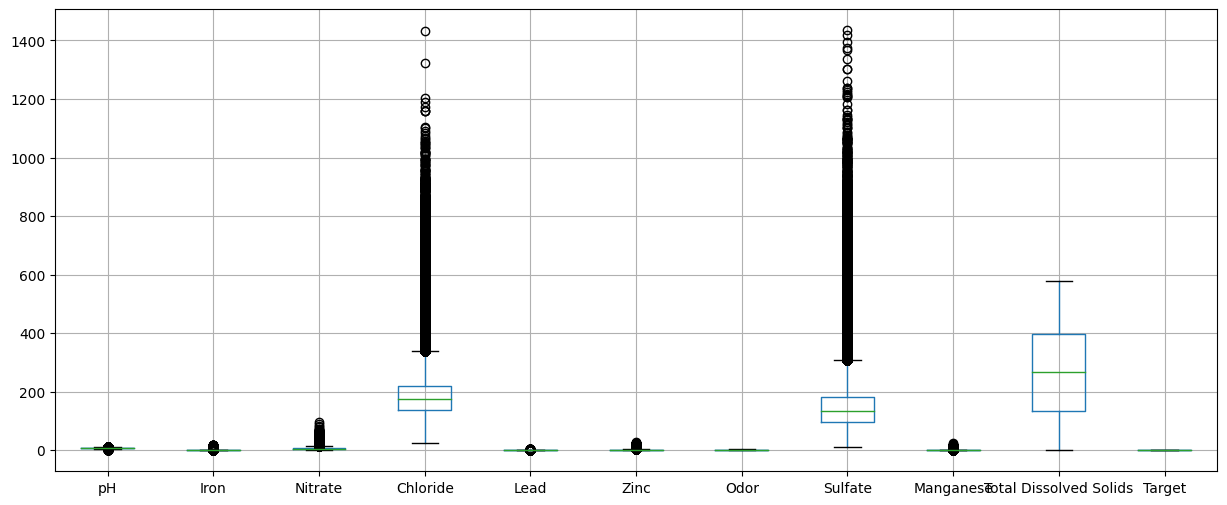

In [58]:
newdata.boxplot(figsize=(15,6))

In [ ]:
# ph               2785 non-null   float64
#  1   Hardness         3276 non-null   float64
#  2   Solids           3276 non-null   float64
#  3   Chloramines      3276 non-null   float64
#  4   Sulfate          2495 non-null   float64
#  5   Conductivity     3276 non-null   float64
#  6   Organic_carbon   3276 non-null   float64
#  7   Trihalomethanes  3114 non-null   float64
#  8   Turbidity        3276 non-null   float64
#  9   Potability